# Amazom Customer Reviews

# 1) Installing librariries needed to extract data from

In [ ]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install cryptography==38.0.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 39.0.2
    Uninstalling cryptography-39.0.2:
      Successfully uninstalled cryptography-39.0.2


In [ ]:
! pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2) Loading our Toys review dataset

In [ ]:
dataset, info = tfds.load("amazon_us_reviews/Toys_v1_00", with_info=True)

In [ ]:
# From the dataset we can extract useful features such as marketplace, product_category, product parent, product_title, start_rating

dataset

{'train': <PrefetchDataset element_spec={'data': {'customer_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'helpful_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'marketplace': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_category': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_parent': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_body': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_date': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_headline': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'star_rating': TensorSpec(shape=(), dtype=tf.int32, name=None), 'total_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'verified_purchase': TensorSpec(shape=(), dtype=tf.int64, name=None), 'vine': TensorSpec(shape=

# Understanding different features of a datset downloaded

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    full_name='amazon_us_reviews/Toys_v1_00/0.1.0',
    description="""
    Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic
    products. In a period of over two decades since the first review in 1995,
    millions of Amazon customers have contributed over a hundred million reviews to
    express opinions and describe their experiences regarding products on the
    Amazon.com website. This makes Amazon Customer Reviews a rich source of
    information for academic researchers in the fields of Natural Language
    Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst
    others. Accordingly, we are releasing this data to further research in multiple
    disciplines related to understanding customer product experiences. Specifically,
    this dataset was constructed to represent a sample of customer evaluations and
    opinions, variation in the perception of a product across geograp

# 3) Extracting features 

In [ ]:
data=[]
train_data = dataset['train']

for example in train_data.take(20000):
    customer_id = example["data"]["customer_id"].numpy().decode('utf-8')
    helpful_votes = example["data"]["helpful_votes"].numpy()
    marketplace = example["data"]["marketplace"].numpy().decode('utf-8')
    product_category = example["data"]["product_category"].numpy().decode('utf-8')
    product_parent = example["data"]["product_parent"].numpy().decode('utf-8')
    product_title = example["data"]["product_title"].numpy().decode('utf-8')
    star_rating = example["data"]["star_rating"].numpy()
    total_votes=example["data"]["total_votes"]
    review_text = example['data']['review_body'].numpy().decode('utf-8')
    review_date = example["data"]["review_date"].numpy().decode('utf-8')
    verified_purchase = example["data"]["verified_purchase"].numpy()
    vine = example["data"]["vine"].numpy()
    
    data.append({'customer_id':customer_id,
                 'helpful_votes':helpful_votes,
                 'marketplace': marketplace,
                 'product_category': product_category,
                 'product_parent': product_parent,
                 'product_title': product_title,
                 'star_rating': star_rating,
                'total_votes':total_votes,
                'review_text':review_text,
                'review_date':review_date,
                'verified_purchase':verified_purchase,
                'vine':vine})


# 4) Creating a dataframe

In [ ]:
# Converting all to dataframe
dataframe=pd.DataFrame(data)
dataframe.to_csv('AmazonReview.csv')

In [ ]:
# dataframe=pd.read_csv("AmazonReview.csv")

In [ ]:
print(dataframe.shape)
print(dataframe.head())

(20000, 12)
  customer_id  helpful_votes marketplace product_category product_parent  \
0    28742093              0          US             Toys      109632221   
1    46808848              0          US             Toys      490557023   
2     7845695              3          US             Toys      581181938   
3    46838198              0          US             Toys      878847044   
4    21560679              0          US             Toys      347328487   

                                       product_title  star_rating  \
0                            Ticket To Ride - Europe            4   
1  LEGO, DC Superheroes, Batman: The Penguin Face...            5   
2                     Battroborg 3-in-1 Battle Arena            3   
3  Loftus International A Series of Amazing Color...            3   
4  Alex Magnetic Boats In The Tub, 3 Boat Set, Ag...            5   

                           total_votes  \
0  tf.Tensor(0, shape=(), dtype=int32)   
1  tf.Tensor(0, shape=(), dtype=

In [ ]:
dataframe['total_votes'] = dataframe['total_votes'].apply(lambda x: x.numpy() if x.numpy() != 0 else 0)

In [ ]:
dataframe.head()

,customer_id,helpful_votes,marketplace,product_category,product_parent,product_title,star_rating,total_votes,review_text,review_date,verified_purchase,vine
0,28742093,0,US,Toys,109632221,Ticket To Ride - Europe,4,0,Great game...a bit more complex than the Ameri...,2014-07-16,0,1
1,46808848,0,US,Toys,490557023,"LEGO, DC Superheroes, Batman: The Penguin Face...",5,0,love it,2015-08-28,0,1
2,7845695,3,US,Toys,581181938,Battroborg 3-in-1 Battle Arena,3,3,In theory is a great toy. It just needs to be ...,2013-10-02,0,1
3,46838198,0,US,Toys,878847044,Loftus International A Series of Amazing Color...,3,0,Not bad for beginners but would def spend the ...,2014-08-25,1,1
4,21560679,0,US,Toys,347328487,"Alex Magnetic Boats In The Tub, 3 Boat Set, Ag...",5,0,It's entertained two grandchildren in the tub ...,2013-11-24,0,1


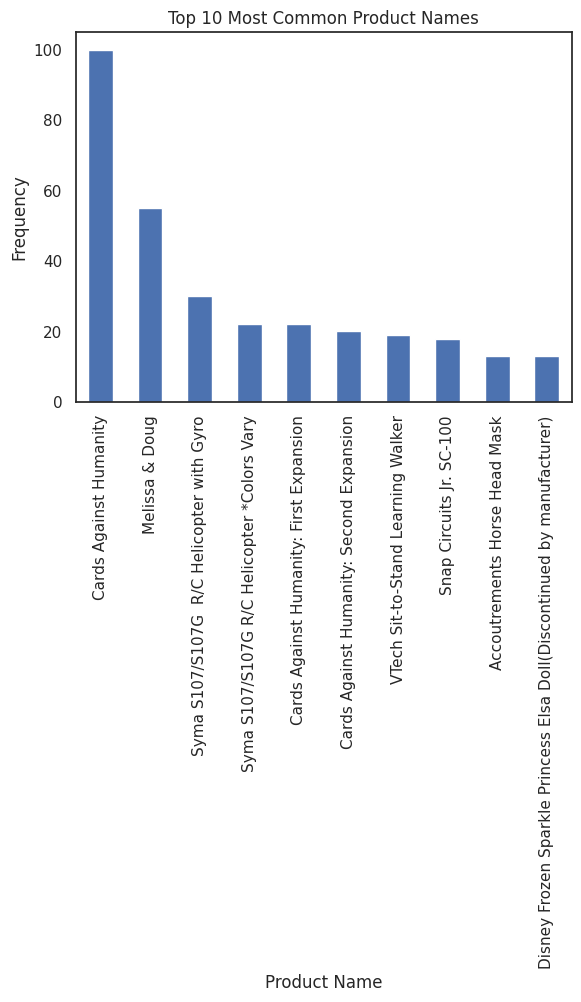

(16394,)

In [ ]:
# Top-10 Product_Titles in dataset

name_counts=dataframe["product_title"].value_counts()
name_counts[:10].plot(kind='bar')
plt.title('Top 10 Most Common Product Names')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.show()
name_counts.shape

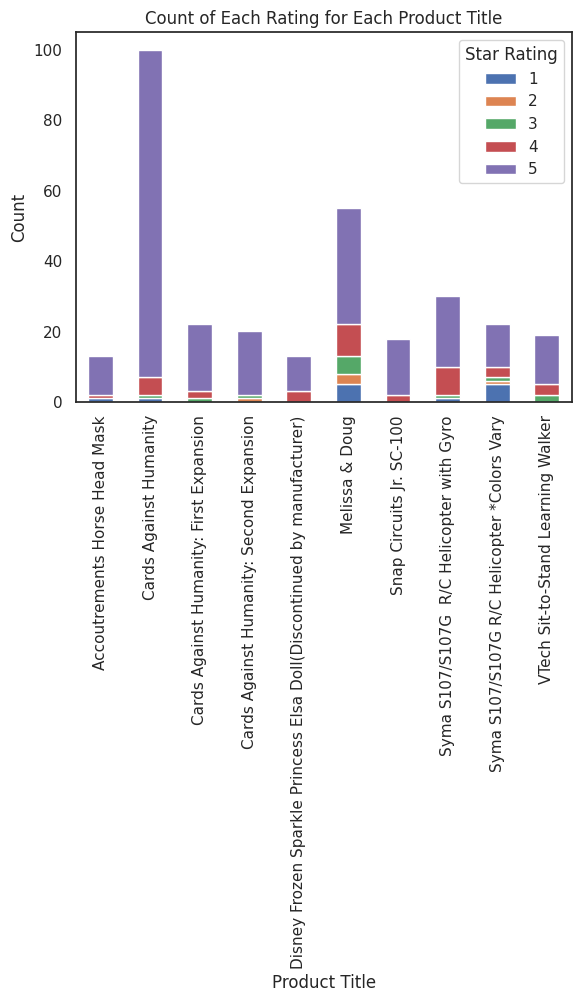

In [ ]:
# Rating visualization of Top-10 Product_Titles
name_counts = dataframe["product_title"].value_counts().nlargest(10)
filtered_data = dataframe[dataframe["product_title"].isin(name_counts.index)]

# get the count of each rating for each product title
counts = filtered_data.groupby('product_title')['star_rating'].value_counts().unstack(fill_value=0)

# create stacked bar plot
counts.plot.bar(stacked=True)

# set plot title and labels
plt.title('Count of Each Rating for Each Product Title')
plt.xlabel('Product Title')
plt.ylabel('Count')
plt.legend(title='Star Rating', loc='upper right')


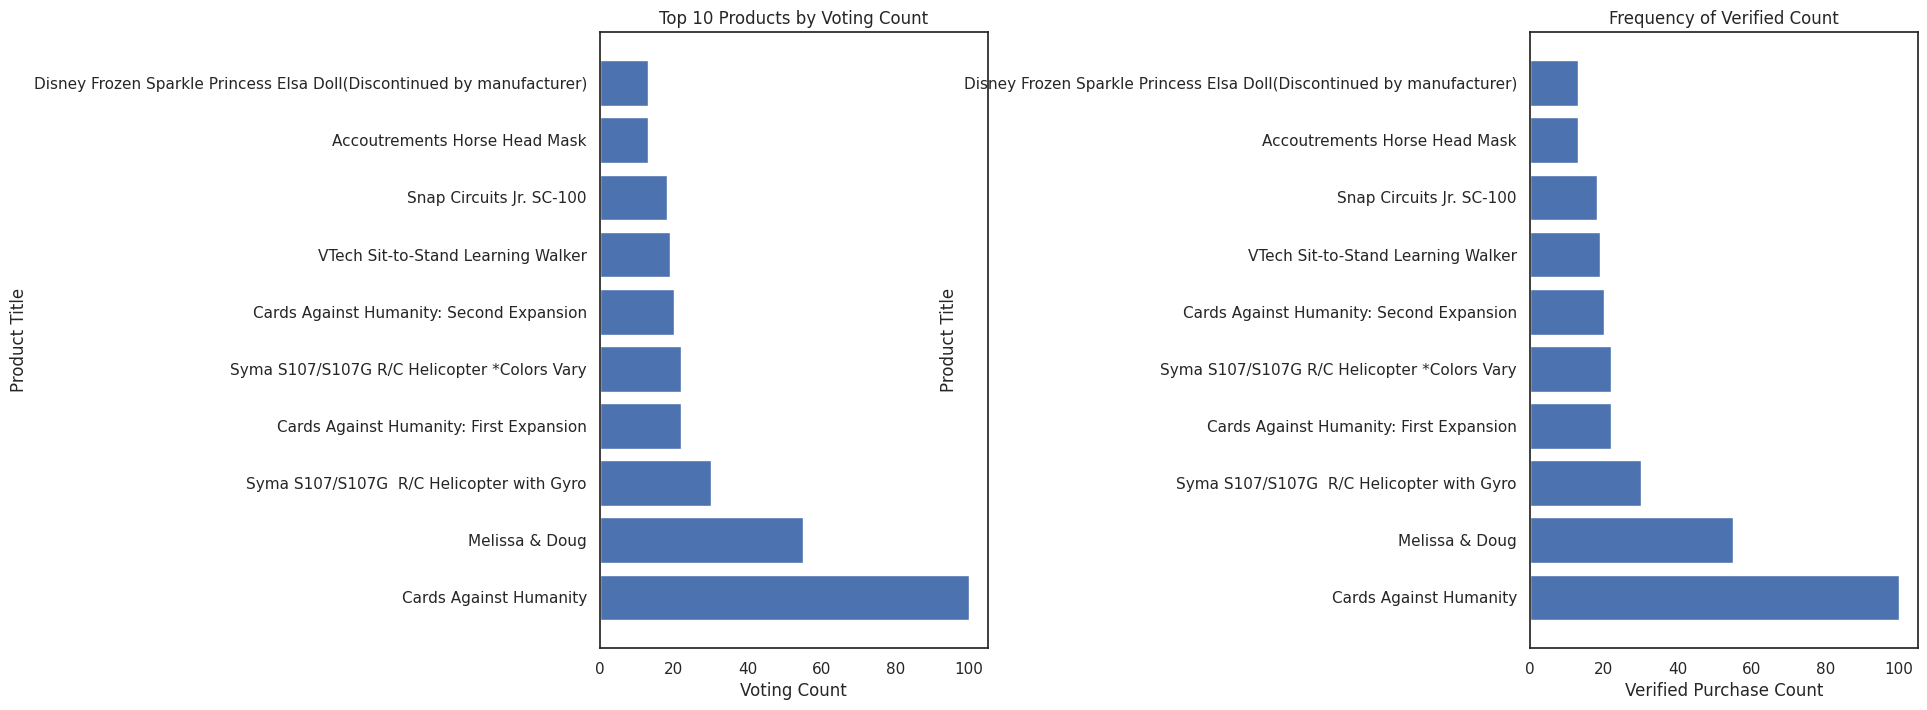

In [ ]:
# Visualizing plot of Total_Votes and Verified_Votes

fig, axs = plt.subplots(1, 2, figsize=(17, 8))

# plot the horizontal bar chart on the first subplot
fil = filtered_data.groupby('product_title')['total_votes'].count().nlargest(10)
fil1 = filtered_data.groupby('product_title')['verified_purchase'].count().nlargest(10)

axs[0].barh(fil.index, fil.values)
axs[0].set_title('Top 10 Products by Voting Count')
axs[0].set_xlabel('Voting Count')
axs[0].set_ylabel('Product Title')

# plot another chart on the second subplot
axs[1].barh(fil.index, fil1.values)
axs[1].set_title('Frequency of Verified Count')
axs[1].set_xlabel('Verified Purchase Count')
axs[1].set_ylabel('Product Title')


# adjust the spacing between subplots
fig.subplots_adjust(wspace=1.4)
# show the plot
plt.show()


# Checking For Null Values

In [ ]:
dataframe.isnull().sum()

customer_id          0
helpful_votes        0
marketplace          0
product_category     0
product_parent       0
product_title        0
star_rating          0
total_votes          0
review_text          0
review_date          0
verified_purchase    0
vine                 0
dtype: int64

In [ ]:
dataframe.describe()

,helpful_votes,star_rating,total_votes,verified_purchase,vine
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.467050,4.209100,1.874250,0.179650,0.991700
std,8.368603,1.268053,9.294969,0.383905,0.090728
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,1.000000
50%,0.000000,5.000000,0.000000,0.000000,1.000000
75%,1.000000,5.000000,1.000000,0.000000,1.000000
max,463.000000,5.000000,473.000000,1.000000,1.000000


In [ ]:
# So we can observe that product_title and review_text are object types

dataframe.dtypes

customer_id          object
helpful_votes         int32
marketplace          object
product_category     object
product_parent       object
product_title        object
star_rating           int32
total_votes           int64
review_text          object
review_date          object
verified_purchase     int64
vine                  int64
dtype: object

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        20000 non-null  object
 1   helpful_votes      20000 non-null  int32 
 2   marketplace        20000 non-null  object
 3   product_category   20000 non-null  object
 4   product_parent     20000 non-null  object
 5   product_title      20000 non-null  object
 6   star_rating        20000 non-null  int32 
 7   total_votes        20000 non-null  int64 
 8   review_text        20000 non-null  object
 9   review_date        20000 non-null  object
 10  verified_purchase  20000 non-null  int64 
 11  vine               20000 non-null  int64 
dtypes: int32(2), int64(3), object(7)
memory usage: 1.7+ MB


# Let's also find the relation between different features

                   helpful_votes  star_rating  total_votes  verified_purchase  \
helpful_votes           1.000000    -0.065577     0.973986           0.137769   
star_rating            -0.065577     1.000000    -0.097222          -0.107161   
total_votes             0.973986    -0.097222     1.000000           0.149302   
verified_purchase       0.137769    -0.107161     0.149302           1.000000   
vine                   -0.026176     0.009436    -0.026734          -0.195495   

                       vine  
helpful_votes     -0.026176  
star_rating        0.009436  
total_votes       -0.026734  
verified_purchase -0.195495  
vine               1.000000  


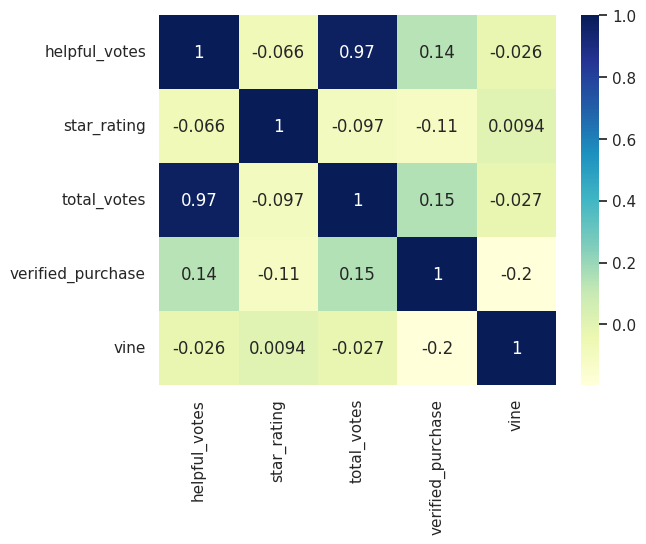

In [ ]:
# We can observe that all voting columns are somewhat co-related

import seaborn as sns

corr = dataframe.corr()
print(corr)
# Create a heatmap of the correlation matrix using Seaborn
sns.set(style="white")
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)


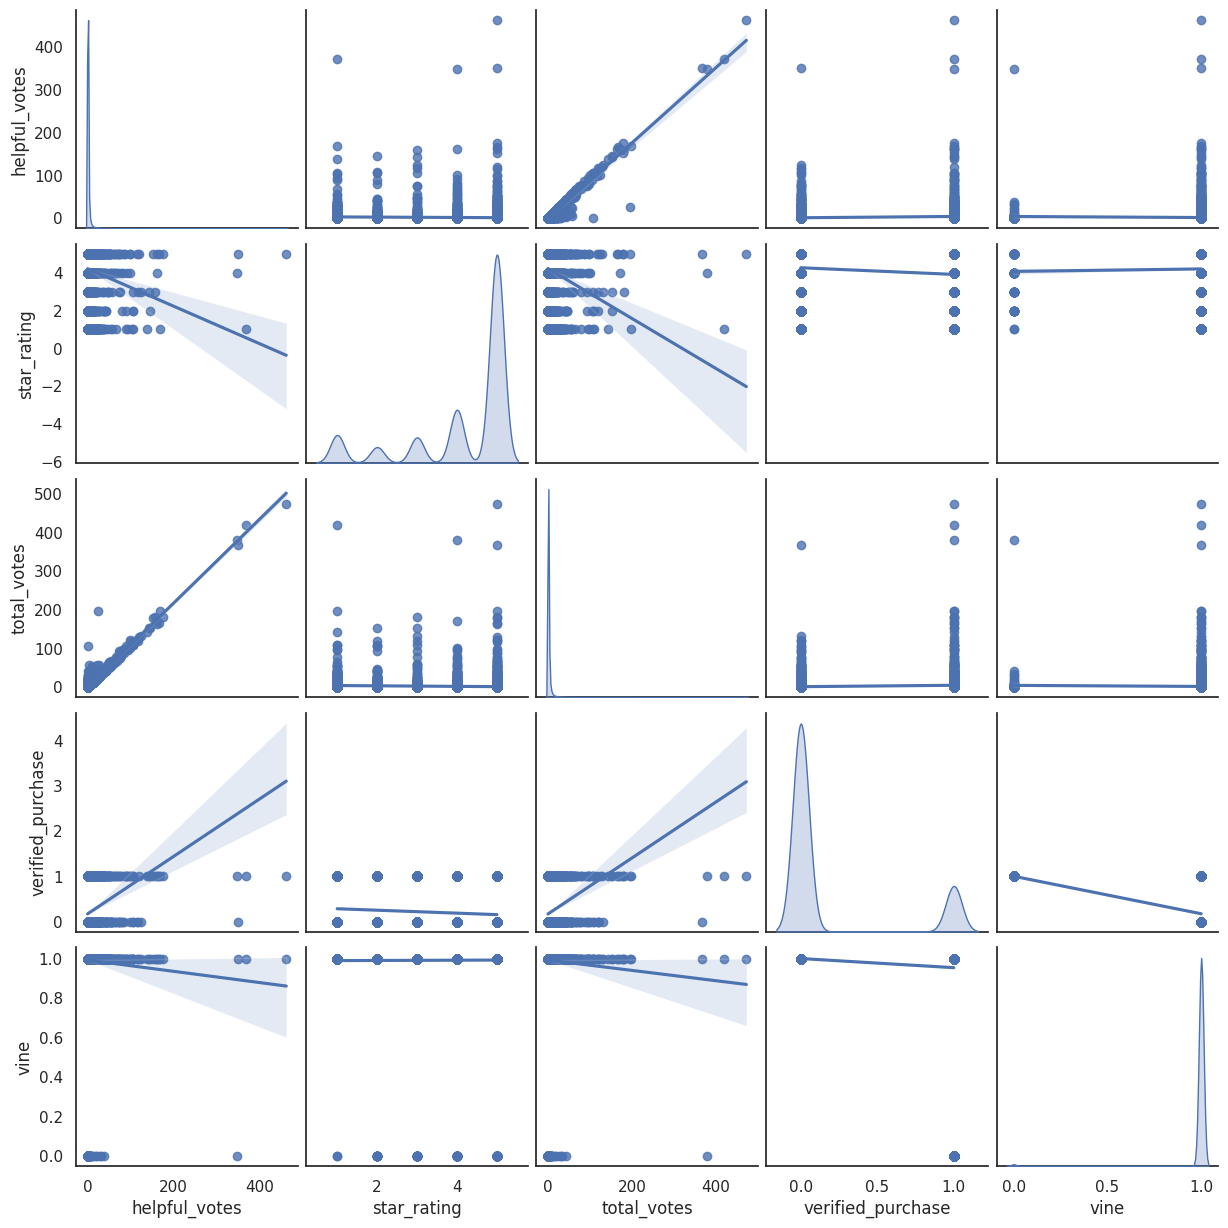

In [ ]:
sns.pairplot(dataframe, diag_kind='kde', kind='reg', palette='husl')

1.0

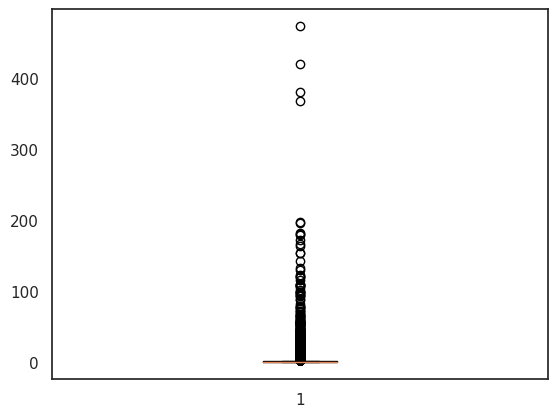

In [ ]:
# Looking for outliers
fig,axs=plt.subplots(1)

plt.boxplot(dataframe['total_votes'])

q1=dataframe["total_votes"].quantile(0.25)
q3=dataframe["total_votes"].quantile(0.75)
iqr=q3-q1
iqr

# Let's drop Columns

In [ ]:
dataframe.drop(columns=['customer_id','product_parent','marketplace','product_category','vine','product_title'],inplace=True)

In [ ]:
# dataframe.head()

<ipython-input-208-03e339b54200>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['star_rating'],ax=axs[2])


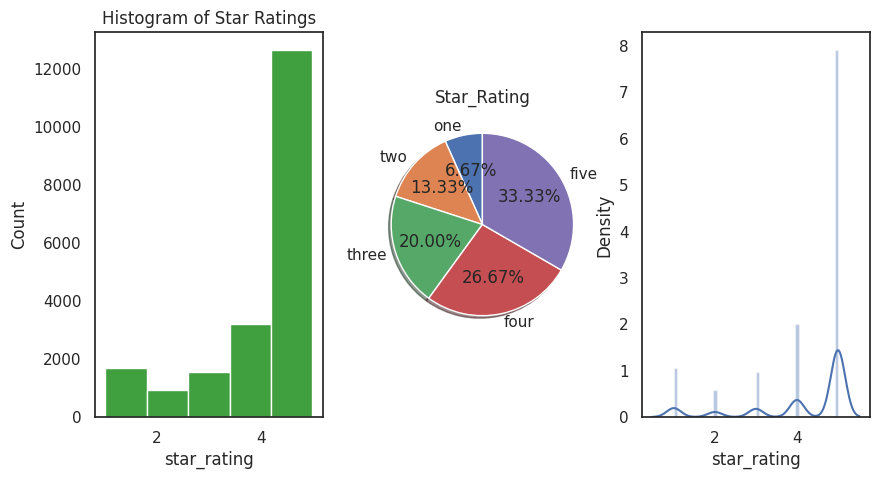

In [ ]:
grouped=dataframe.groupby(['star_rating', 'verified_purchase'])['verified_purchase'].count()

# To check which one is the biggest portion we use autopct
# create histogram of star_rating values
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

sns.histplot(data=dataframe, x='star_rating', bins=5, color='green', ax=axs[0])
axs[0].set_title('Histogram of Star Ratings')

groupedrating = [10, 20, 30, 40, 50]
axs[1].pie(np.array(groupedrating), labels=['one', 'two', 'three', 'four', 'five'],
           autopct="%0.2f%%", startangle=90, shadow=True)
axs[1].set_title('Star_Rating')

sns.distplot(dataframe['star_rating'],ax=axs[2])

plt.show()

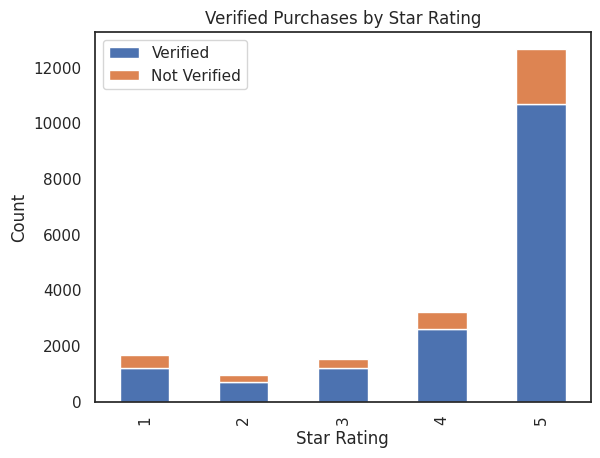

In [ ]:
# pivot the table to get the counts by star_rating and verified_purchase
pivot_table = grouped.unstack()

# plot the pivot table
pivot_table.plot(kind='bar', stacked=True)

# add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Verified Purchases by Star Rating')
plt.legend(['Verified', 'Not Verified'])

# show the plot
plt.show()

# We can observe that majority are not verified_purchase.

# Feature Engineering

In [ ]:
# convert review_date to datetime format
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# extract year, month, and day
dataframe['review_year'] = dataframe['review_date'].dt.year
dataframe['review_month'] = dataframe['review_date'].dt.month
dataframe['review_day'] = dataframe['review_date'].dt.day

# # display first few rows of updated DataFrame
# dataframe.head()


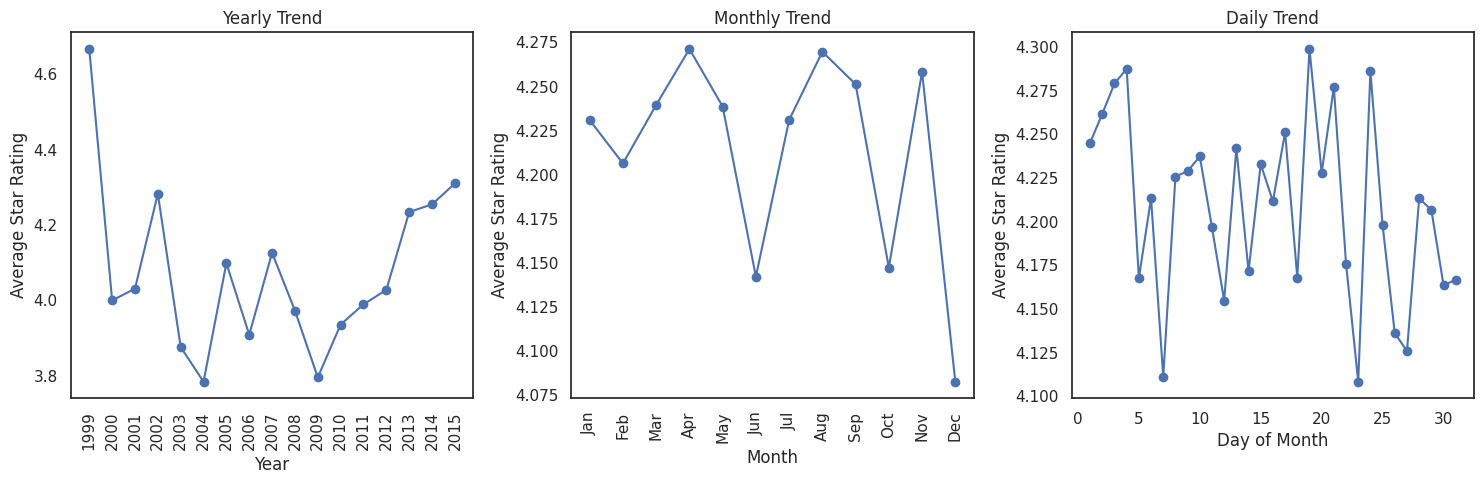

review_date
1999    4.666667
2000    4.000000
2001    4.031250
2002    4.283019
2003    3.876543
2004    3.784483
2005    4.098684
2006    3.909091
2007    4.126263
2008    3.973244
2009    3.795970
2010    3.936131
2011    3.989667
2012    4.028005
2013    4.234318
2014    4.254748
2015    4.310057
Name: star_rating, dtype: float64

In [ ]:
# convert review_date to datetime
dataframe['review_date'] = pd.to_datetime(dataframe['review_date'])

# plot year trend
grouped_data_year = dataframe.groupby(dataframe['review_date'].dt.year)['star_rating'].mean()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.plot(grouped_data_year.index, grouped_data_year.values, marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Star Rating')
ax1.set_title('Yearly Trend')
ax1.set_xticks(grouped_data_year.index)
ax1.set_xticklabels(grouped_data_year.index,rotation=90)

# plot month trend
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
grouped_data_month = dataframe.groupby(dataframe['review_date'].dt.month)['star_rating'].mean()
ax2.plot(grouped_data_month.index, grouped_data_month.values, marker='o')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Star Rating')
ax2.set_title('Monthly Trend')
ax2.set_xticks(range(1, len(months) + 1))
ax2.set_xticklabels(months,rotation=90)


# plot day trend
grouped_data_day = dataframe.groupby(dataframe['review_date'].dt.day)['star_rating'].mean()
ax3.plot(grouped_data_day.index, grouped_data_day.values, marker='o')
ax3.set_xlabel('Day of Month')
ax3.set_ylabel('Average Star Rating')
ax3.set_title('Daily Trend')

plt.tight_layout()
plt.show()
grouped_data_year

In [ ]:
# As we have not extracted information from review_date column to new features. We can drop this columns also

dataframe.drop(columns=["review_date"],axis=1,inplace=True)

In [ ]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess_text(text):

    pattern = r'[^\w\s]|[\d]+|\s+'
    text=re.sub(pattern,"",text)

    # Convert text to lowercase
    text = text.lower()
    
    # remove punctuation from the text
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords and stem words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    # Join words back into text
    text = ' '.join(words)
    
    return text

# Apply preprocessing function to review_text column
dataframe['review_text'] = dataframe['review_text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
dataframe_copy=dataframe.copy()

# Let's split dataframe into training and testing

In [ ]:


from sklearn.model_selection import train_test_split

y=dataframe['star_rating']
dataframe.drop(columns='star_rating',inplace=True)

# Split the data into training and testing sets, with 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(dataframe, y, test_size=0.2, random_state=42)


In [ ]:
# Creating a copy of X-train and X_test

X_train_copy=X_train
X_test_copy=X_test

# Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import pandas as pd

count = CountVectorizer()
count_matrix = count.fit_transform(X_train_copy['review_text'])
vectors_df = pd.DataFrame(count_matrix.toarray())
vectors_df.columns = count.get_feature_names_out()

pca = PCA(n_components=20)
final_train = pca.fit_transform(vectors_df)

count_matrix_X_test = count.transform(X_test_copy['review_text'])
vectors_df_test = pd.DataFrame(count_matrix_X_test.toarray())
vectors_df_test.columns = count.get_feature_names_out()
final_test = pca.transform(vectors_df_test)

final_train.shape

(16000, 20)

In [ ]:
X_train_copy.drop(columns=['review_text'],inplace=True)
X_test_copy.drop(columns=['review_text'],inplace=True)

train_df = pd.concat([X_train_copy, pd.DataFrame(final_train)], axis=1)
test_df = pd.concat([X_test_copy, pd.DataFrame(final_test)], axis=1)

print(train_df.shape)
print(test_df.shape)
train_df.columns = train_df.columns.astype(str)
test_df.columns = test_df.columns.astype(str)

(19216, 26)
(7219, 26)


In [ ]:
# Before dropping I must merge my train_df and y_train so that they have same shape after dropping

train_df=pd.concat([train_df,y_train],axis=1)
test_df=pd.concat([test_df,y_test],axis=1)

In [ ]:
# Check for NAN values as PCA might have included NAN values

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [ ]:
# Now agin seperating x and y

y_train=train_df['star_rating']
y_test=test_df['star_rating']

train_df.drop(columns=['star_rating'],inplace=True)
test_df.drop(columns=['star_rating'],inplace=True)

# Creating a model

Decision Tree
Accuracy Score :  0.3854033290653009
Classification Report :                precision    recall  f1-score   support

         1.0       0.11      0.12      0.12        58
         2.0       0.06      0.18      0.09        45
         3.0       0.12      0.09      0.10        68
         4.0       0.18      0.21      0.19       126
         5.0       0.65      0.52      0.58       484

    accuracy                           0.39       781
   macro avg       0.22      0.22      0.22       781
weighted avg       0.45      0.39      0.41       781



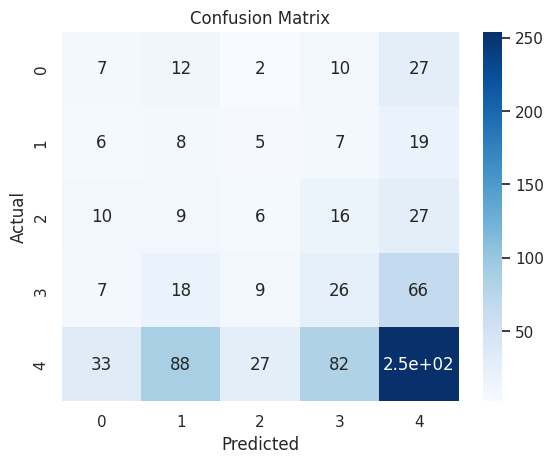

------------------------------------------------------------------------
Random Forest
Accuracy Score :  0.6133162612035852
Classification Report :                precision    recall  f1-score   support

         1.0       0.86      0.10      0.18        58
         2.0       0.00      0.00      0.00        45
         3.0       0.50      0.01      0.03        68
         4.0       0.18      0.05      0.08       126
         5.0       0.63      0.96      0.76       484

    accuracy                           0.61       781
   macro avg       0.43      0.23      0.21       781
weighted avg       0.53      0.61      0.50       781



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


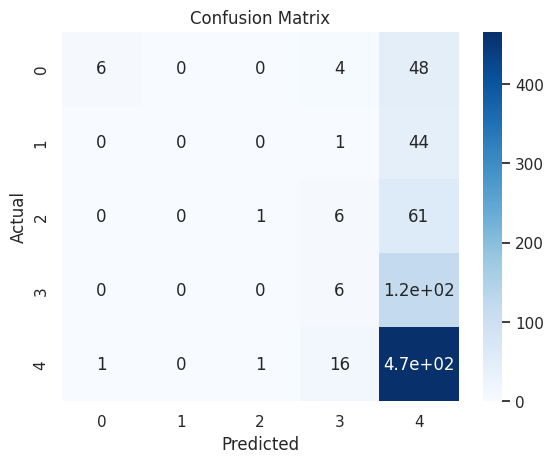

------------------------------------------------------------------------
Logistic Regression


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

Accuracy Score :  0.6222791293213829
Classification Report :                precision    recall  f1-score   support

         1.0       0.57      0.07      0.12        58
         2.0       0.00      0.00      0.00        45
         3.0       0.00      0.00      0.00        68
         4.0       0.00      0.00      0.00       126
         5.0       0.62      1.00      0.77       484

    accuracy                           0.62       781
   macro avg       0.24      0.21      0.18       781
weighted avg       0.43      0.62      0.48       781



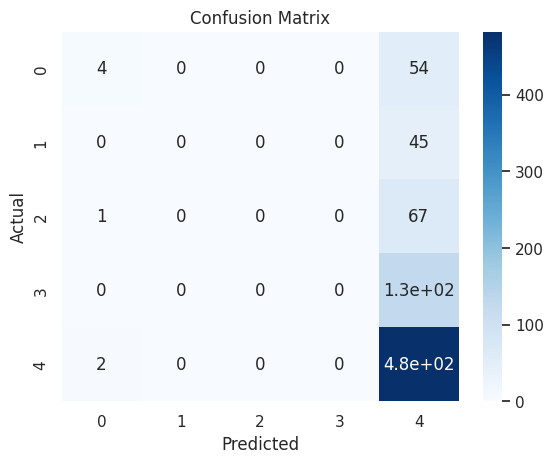

------------------------------------------------------------------------
[0.3854033290653009, 0.6133162612035852, 0.6222791293213829]
Best Model is : Logistic Regression with accuracy of 0.622279


In [ ]:
# Predicting accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


score=[]
def checkModelAccuracy(result):
    print("Accuracy Score : ",accuracy_score(y_test, result))
    score.append(accuracy_score(y_test,result))
    
    # Classification Report
    from sklearn.metrics import classification_report
    print("Classification Report : ",classification_report(y_test,result))

    # Confusion Matrix
    cm = confusion_matrix(y_test, result)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
# Lets try different machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

names = ["Decision Tree", "Random Forest", "Logistic Regression"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
    ]

 
for name, clf in zip(names, classifiers):
    if name == "Decision Tree":
        print("Decision Tree")
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(train_df,y_train)
        decisionTreeResult=clf.predict(test_df)
        checkModelAccuracy(decisionTreeResult)
        plt.show()
        print("------------------------------------------------------------------------")
    elif name == "Logistic Regression":
        print("Logistic Regression")
        clf = LogisticRegression()
        clf.fit(train_df,y_train)
        logisticRegressionResult=clf.predict(test_df)
        checkModelAccuracy(logisticRegressionResult)
        plt.show()
        print("------------------------------------------------------------------------")
    elif name == "Random Forest":
        print("Random Forest")
        clf = RandomForestClassifier(random_state=0)
        clf.fit(train_df,y_train)
        randomForestResult=clf.predict(test_df)
        checkModelAccuracy(randomForestResult)
        plt.show()
        print("------------------------------------------------------------------------")
print(score)  
print("Best Model is : %s with accuracy of %f"%(names[score.index(max(score))],max(score)))

In [ ]:
# this model using hyperparameter tuning

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10,20,30]
}
regr = RandomForestClassifier(random_state=0)
clf = GridSearchCV(regr, parameters)
clf.fit(train_df, y_train)
print("Accuracy Score : ",accuracy_score(y_test, clf.predict(test_df)))



Accuracy Score :  0.6197183098591549


# Tfidf Vectorizer

In [ ]:
# Creating a copy of X-train and X_test

X_train_copy=X_train
X_test_copy=X_test

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a TfidfVectorizer object
count = TfidfVectorizer()
count_matrix = count.fit_transform(X_train_copy['review_text'])
vectors_df = pd.DataFrame(count_matrix.toarray())
vectors_df.columns = count.get_feature_names_out()

pca = PCA(n_components=20)
final_train = pca.fit_transform(vectors_df)

count_matrix_X_test = count.transform(X_test_copy['review_text'])
vectors_df_test = pd.DataFrame(count_matrix_X_test.toarray())
vectors_df_test.columns = count.get_feature_names_out()
final_test = pca.transform(vectors_df_test)

final_train.shape


(16000, 20)

In [ ]:
X_train_copy.drop(columns=['review_text'],inplace=True)
X_test_copy.drop(columns=['review_text'],inplace=True)

train_df = pd.concat([X_train_copy, pd.DataFrame(final_train)], axis=1)
test_df = pd.concat([X_test_copy, pd.DataFrame(final_test)], axis=1)

print(train_df.shape)
print(test_df.shape)
train_df.columns = train_df.columns.astype(str)
test_df.columns = test_df.columns.astype(str)

(19216, 26)
(7219, 26)


In [ ]:
# Before dropping I must merge my train_df and y_train so that they have same shape after dropping

train_df=pd.concat([train_df,y_train],axis=1)
test_df=pd.concat([test_df,y_test],axis=1)

In [ ]:
# Check for NAN values as PCA might have included NAN values

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [ ]:
# Now agin seperating x and y

y_train=train_df['star_rating']
y_test=test_df['star_rating']

train_df.drop(columns=['star_rating'],inplace=True)
test_df.drop(columns=['star_rating'],inplace=True)

Decision Tree
Accuracy Score :  0.4622279129321383
Classification Report :                precision    recall  f1-score   support

         1.0       0.13      0.26      0.17        58
         2.0       0.16      0.09      0.11        45
         3.0       0.08      0.06      0.07        68
         4.0       0.19      0.20      0.19       126
         5.0       0.68      0.65      0.66       484

    accuracy                           0.46       781
   macro avg       0.25      0.25      0.24       781
weighted avg       0.48      0.46      0.47       781



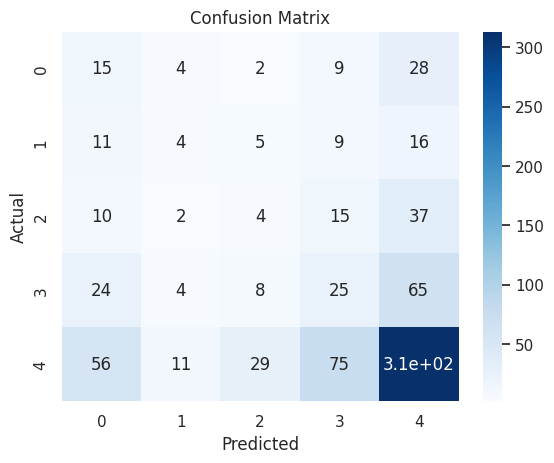

------------------------------------------------------------------------
Random Forest
Accuracy Score :  0.6069142125480154
Classification Report :                precision    recall  f1-score   support

         1.0       0.50      0.05      0.09        58
         2.0       0.00      0.00      0.00        45
         3.0       1.00      0.03      0.06        68
         4.0       0.18      0.06      0.09       126
         5.0       0.63      0.95      0.76       484

    accuracy                           0.61       781
   macro avg       0.46      0.22      0.20       781
weighted avg       0.54      0.61      0.50       781



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


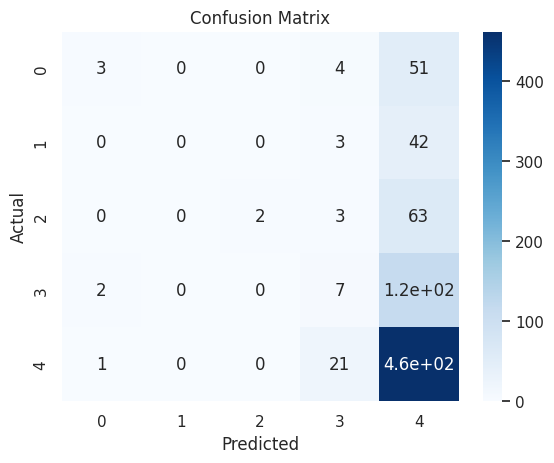

------------------------------------------------------------------------
Logistic Regression


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with n

Accuracy Score :  0.6209987195902689
Classification Report :                precision    recall  f1-score   support

         1.0       0.57      0.07      0.12        58
         2.0       0.00      0.00      0.00        45
         3.0       0.00      0.00      0.00        68
         4.0       0.00      0.00      0.00       126
         5.0       0.62      0.99      0.77       484

    accuracy                           0.62       781
   macro avg       0.24      0.21      0.18       781
weighted avg       0.43      0.62      0.48       781



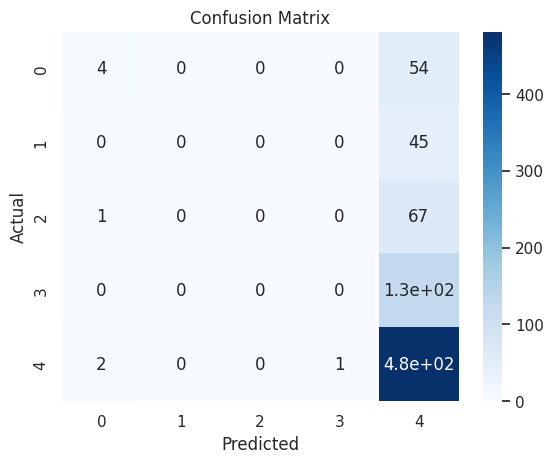

------------------------------------------------------------------------
[0.4622279129321383, 0.6069142125480154, 0.6209987195902689]
Best Model is : Logistic Regression with accuracy of 0.620999


In [ ]:
# Predicting accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


score=[]
def checkModelAccuracy(result):
    print("Accuracy Score : ",accuracy_score(y_test, result))
    score.append(accuracy_score(y_test,result))
    
    # Classification Report
    from sklearn.metrics import classification_report
    print("Classification Report : ",classification_report(y_test,result))

    # Confusion Matrix
    cm = confusion_matrix(y_test, result)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
# Lets try different machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

names = ["Decision Tree", "Random Forest", "Logistic Regression"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression()
    ]

 
for name, clf in zip(names, classifiers):
    if name == "Decision Tree":
        print("Decision Tree")
        clf = DecisionTreeClassifier(random_state=0)
        clf.fit(train_df,y_train)
        decisionTreeResult=clf.predict(test_df)
        checkModelAccuracy(decisionTreeResult)
        plt.show()
        print("------------------------------------------------------------------------")
    elif name == "Logistic Regression":
        print("Logistic Regression")
        clf = LogisticRegression()
        clf.fit(train_df,y_train)
        logisticRegressionResult=clf.predict(test_df)
        checkModelAccuracy(logisticRegressionResult)
        plt.show()
        print("------------------------------------------------------------------------")
    elif name == "Random Forest":
        print("Random Forest")
        clf = RandomForestClassifier(random_state=0)
        clf.fit(train_df,y_train)
        randomForestResult=clf.predict(test_df)
        checkModelAccuracy(randomForestResult)
        plt.show()
        print("------------------------------------------------------------------------")
print(score)  
print("Best Model is : %s with accuracy of %f"%(names[score.index(max(score))],max(score)))

# Wordnet

In [ ]:
from nltk.corpus import wordnet


# nltk.download('wordnet')
# Define the seed words "good" and "bad"
seed_pos = wordnet.synset('good.a.01')
seed_neg = wordnet.synset('bad.a.01')

# Expand the list of positive words by finding related words with similar meanings
positive_words = set([lemma.name() for synset in seed_pos.closure(lambda s: s.similar_tos()) for lemma in synset.lemmas()])

# Expand the list of negative words by finding related words with similar meanings
negative_words = set([lemma.name() for synset in seed_neg.closure(lambda s: s.similar_tos()) for lemma in synset.lemmas()])

# Print the first 10 positive and negative words
print("Positive words:", list(positive_words)[:10])
print("Negative words:", list(negative_words)[:10])


Positive words: ['well_behaved', 'good_enough', 'cracking', 'dandy', 'solid', 'satisfactory', 'bully', 'slap-up', 'acceptable', 'not_bad']
Negative words: ['rotten', 'painful', 'terrible', 'hard', 'uncool', 'severe', 'distressing', 'swingeing', 'atrocious', 'mediocre']


/usr/local/lib/python3.9/dist-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('good.a.01') at depth 2
  for synset in acyclic_breadth_first(self, rel, depth):
/usr/local/lib/python3.9/dist-packages/nltk/corpus/reader/wordnet.py:604: UserWarning: Discarded redundant search for Synset('bad.a.01') at depth 2
  for synset in acyclic_breadth_first(self, rel, depth):


# Checking Sentiment Of Top-10 Toys in Dataset


In [ ]:
from nltk.tokenize import word_tokenize

# Define a function to calculate the sentiment score of a review
def calculate_sentiment(review):
    # Split the review into individual words
    words = word_tokenize(review)
    
    # Count the number of positive and negative words in the review
    num_positive_words = sum([1 for word in words if word in positive_words])
    num_negative_words = sum([1 for word in words if word in negative_words])
    
    # Calculate the sentiment score as the difference between the number of positive and negative words
    sentiment_score = num_positive_words - num_negative_words
    
    return sentiment_score

# Apply the sentiment analysis function to each review and store the results in a new column
filtered_data['sentiment'] = filtered_data['review_text'].apply(calculate_sentiment)

# Print the first 10 rows of the dataframe with the sentiment scores
print(filtered_data[['product_title','review_text', 'sentiment']].head(10))

                                         product_title  \
71   Disney Frozen Sparkle Princess Elsa Doll(Disco...   
134           Cards Against Humanity: Second Expansion   
367                             Cards Against Humanity   
481                                     Melissa & Doug   
507                                     Melissa & Doug   
551                 VTech Sit-to-Stand Learning Walker   
555           Cards Against Humanity: Second Expansion   
584                           Snap Circuits Jr. SC-100   
606                           Snap Circuits Jr. SC-100   
622            Cards Against Humanity: First Expansion   

                                           review_text  sentiment  
71   great doll...we also have Anna.....they are sl...          1  
134  Worst game ever!  No, just kidding.  This expa...          0  
367  Great to convert as a drinking game. I still c...          0  
481  Its great except the hair dryer doesn't work a...          1  
507  Our grandson, ag

<ipython-input-51-848dec6a3ac5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['review_text'].apply(calculate_sentiment)
